In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to access dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/sensor_raw.csv')         # https://data.mendeley.com/datasets/jj3tw8kj6h/2
df2.tail()                          # to display last 5 rows

,Target(Class),GyroX,GyroY,GyroZ,AccX,AccY,AccZ
1109,4,-1.961832,2.358779,8.893130,0.472900,-0.431152,-0.873535
1110,4,-0.435115,5.396947,1.282443,0.459961,-0.227051,-0.967041
1111,4,-1.061069,4.534351,1.183206,0.419189,-0.192871,-1.002686
1112,4,-1.015267,5.259542,0.656489,0.308838,-0.090088,-1.023193
1113,4,-0.877863,4.488550,0.045802,0.098145,-0.015869,-1.001221


In [ ]:
df2.shape

(1114, 7)

In [ ]:
df2.columns

Index(['Target(Class)', 'GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ'], dtype='object')

In [ ]:
df2.describe()

# the min max values from here are used in the subsequent cells to find appropriate bins (hist)
# no value is missing (inferred from count of each column)

,Target(Class),GyroX,GyroY,GyroZ,AccX,AccY,AccZ
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,2.490126,-0.829957,4.122309,1.076404,0.252417,-0.095110,-0.983215
std,1.051415,3.404297,3.252790,12.049384,0.183155,0.190407,0.098061
min,1.000000,-14.946565,-10.351145,-50.259542,-0.252686,-0.793457,-1.367920
25%,2.000000,-2.274809,2.610687,0.282443,0.132202,-0.179077,-1.031372
50%,3.000000,-0.698473,4.290076,0.961832,0.244507,-0.102295,-0.986938
75%,3.000000,0.784351,5.761450,1.992366,0.372559,-0.023010,-0.928223
max,4.000000,12.778626,16.793893,45.442748,0.747803,0.768555,-0.456787


Text(0.5, 1.0, 'GyroX')

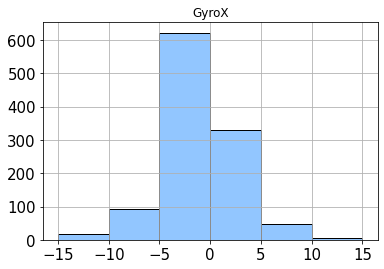

In [ ]:
plt.style.use('seaborn-pastel')
bins = [-15,-10,-5,0,5,10,15]
df2['GyroX'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('GyroX')

Text(0.5, 1.0, 'GyroY')

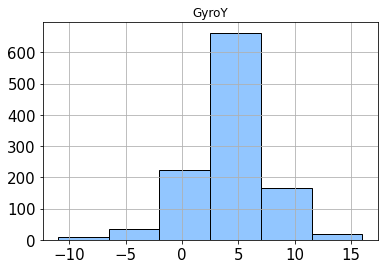

In [ ]:
plt.style.use('seaborn-pastel')
bins = [-11,-6.5,-2,2.5,7,11.5,16]
df2['GyroY'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('GyroY')

Text(0.5, 1.0, 'GyroZ')

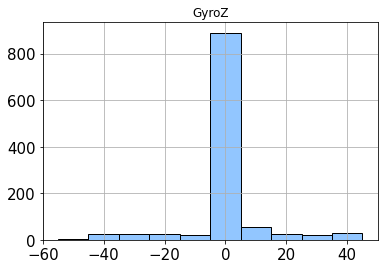

In [ ]:
plt.style.use('seaborn-pastel')
bins = [-55,-45,-35,-25,-15,-5,5,15,25,35,45]
df2['GyroZ'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('GyroZ')

Text(0.5, 1.0, 'AccX')

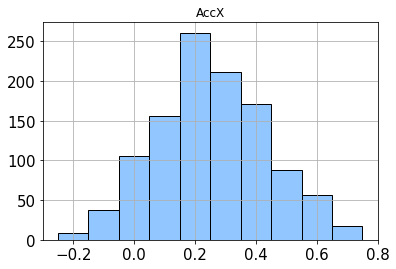

In [ ]:
plt.style.use('seaborn-pastel')
bins = [-0.25,-0.15,-0.05,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75]
df2['AccX'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('AccX')

Text(0.5, 1.0, 'AccY')

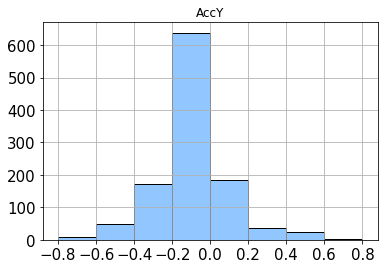

In [ ]:
plt.style.use('seaborn-pastel')
bins = [-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8]
df2['AccY'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('AccY')

Text(0.5, 1.0, 'AccZ')

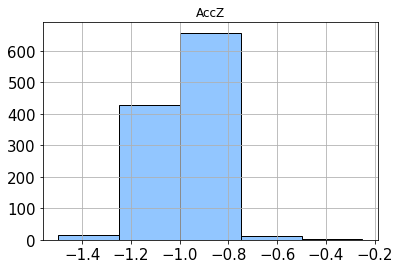

In [ ]:
plt.style.use('seaborn-pastel')
bins = [-1.5,-1.25,-1,-0.75,-0.5,-0.25]
df2['AccZ'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('AccZ')

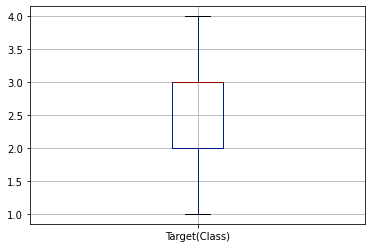

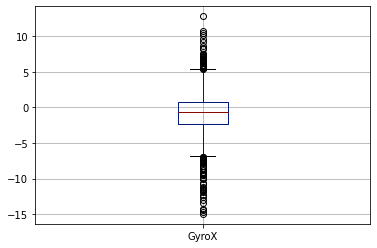

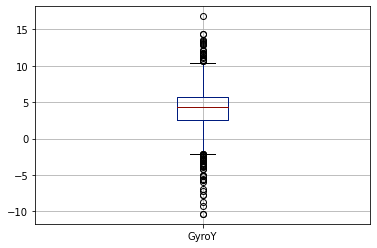

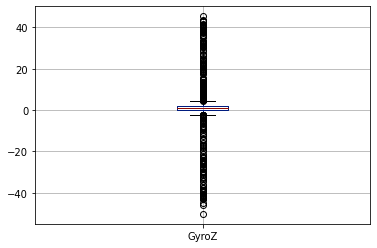

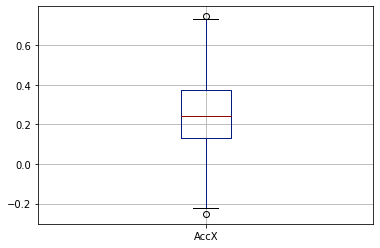

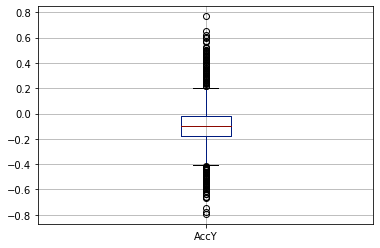

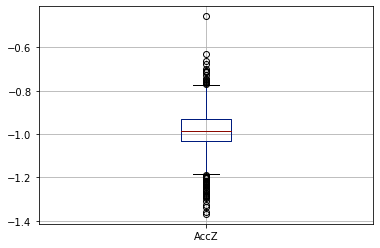

In [ ]:
plt.style.use('seaborn-dark-palette')

for col in df2.columns:
  df2.boxplot(column = col)         # box plot to observe the distribution of values in different columns
  plt.show()

Conclusion from the histograms and boxplots:


1.   GyroZ is highly concentrated at the centre.
2.   AccX is roughly a normal distribution.
3.   Rest of the features also have significant outliers.
4.   All features are roughly symmetrically distributed around the mean.

A model trained based on a more distributed feature can make a reliable prediction for a longer range of feature values than a concentrated feature.


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

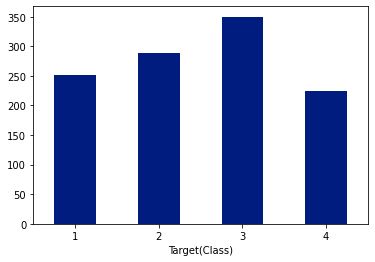

In [ ]:
plt.style.use('seaborn-dark-palette')

df2.groupby('Target(Class)').size().plot(kind='bar')
plt.xticks(rotation=0)

# Sudden Acceleration (Class Label: 1), Sudden Right Turn (Class Label: 2), Sudden Left Turn (Class Label: 3), Sudden Break (Class Label: 4)

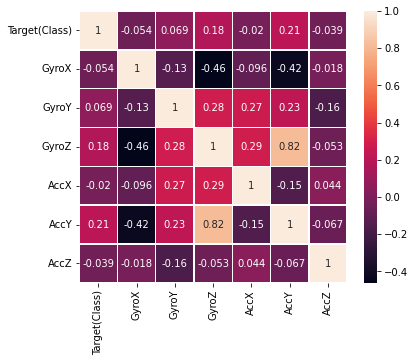

In [ ]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(6,5)) 
sns.heatmap(df2.corr(), annot=True, linewidths=.5, ax=ax) 

From the above correlation heatmap, it is clear that GyroZ and AccY are highly related to each other and have significant relation with the target class and GyroX.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


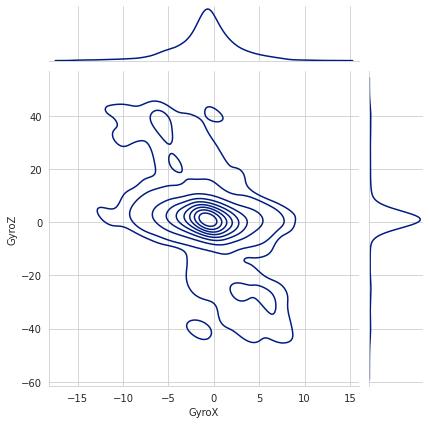

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


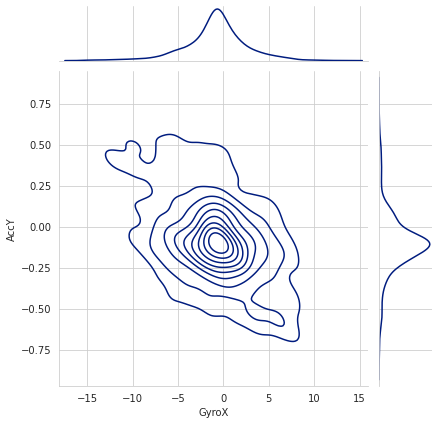

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


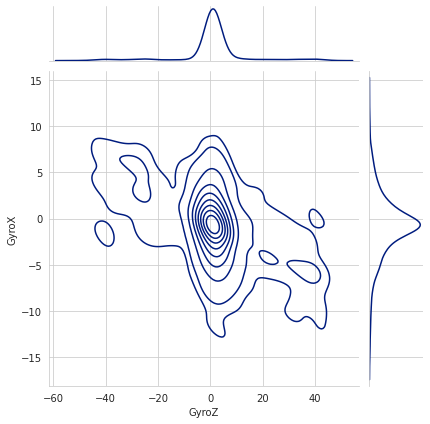

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


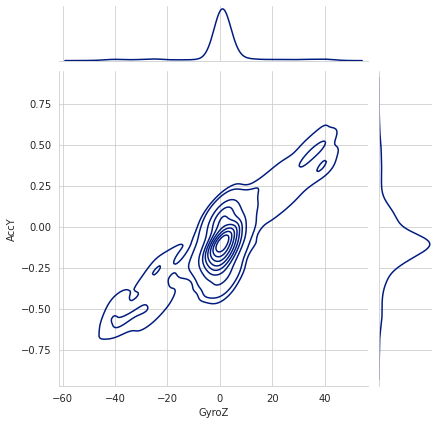

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


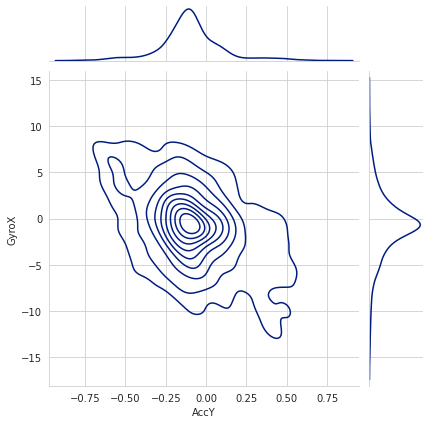

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


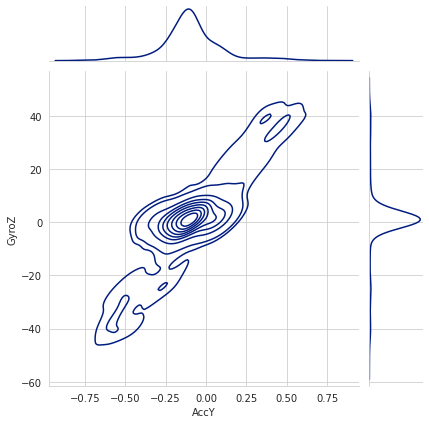

In [ ]:
# plotting pair-wise interaction of highly related columns

cols = ['GyroX','GyroZ','AccY']

for col in cols:
    for col_y in cols:
        if col == col_y:
          continue
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=df2, kind='kde')
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

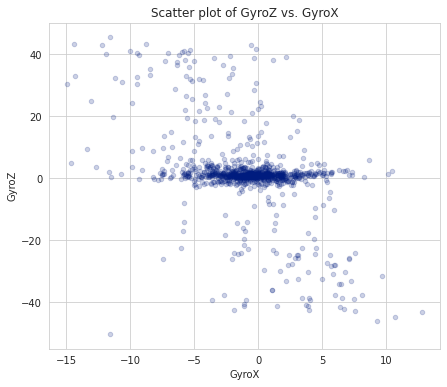

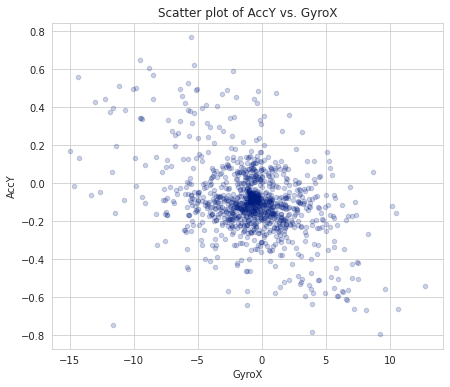

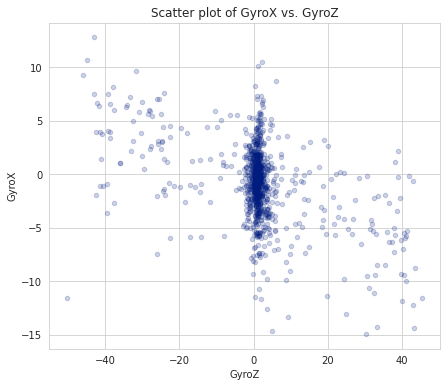

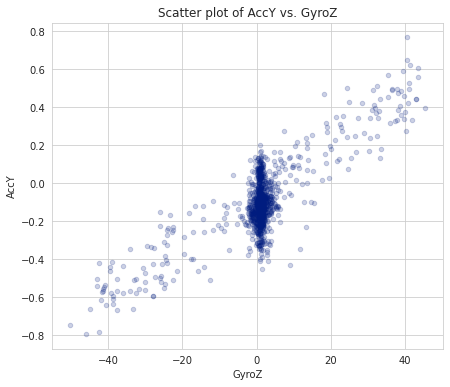

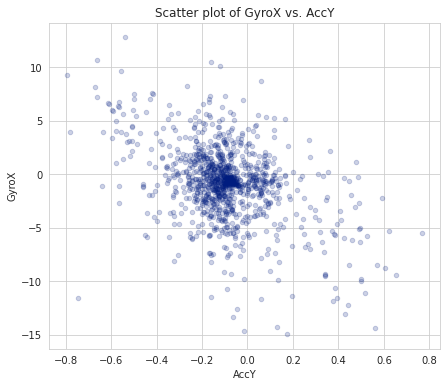

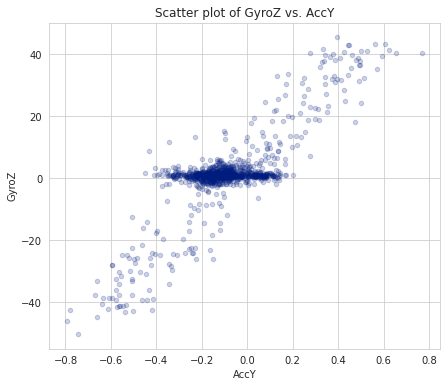

In [ ]:
for col in cols:
    for col_y in cols:
        if col == col_y:
          continue
        fig = plt.figure(figsize=(7,6))
        ax = fig.gca()
        df2.plot.scatter(x = col, y = col_y, ax = ax, alpha = 0.2)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)
        plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


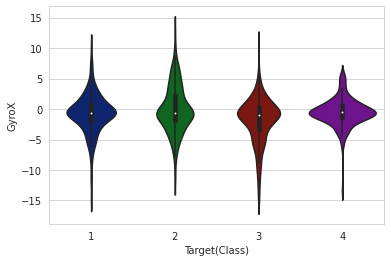

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


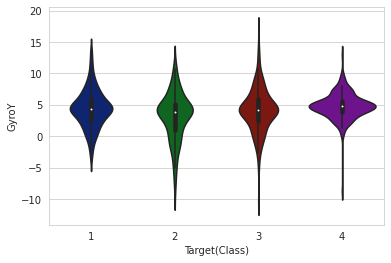

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


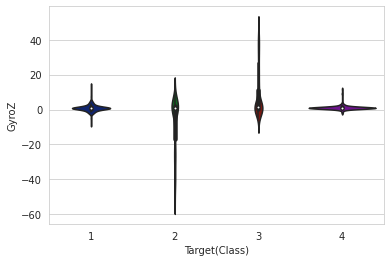

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


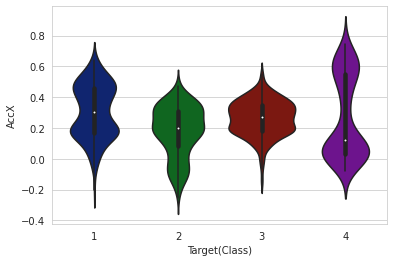

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


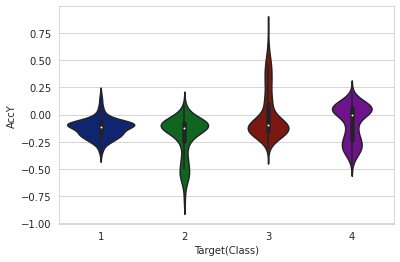

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


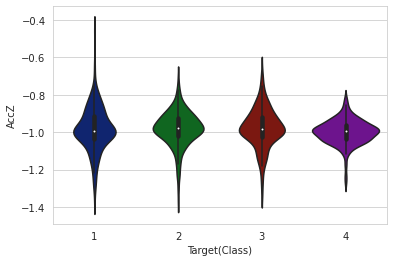

In [ ]:
# distribution of features for different values of target

sns.set_style("whitegrid")
cont_col = ['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ']

for col in cont_col:
  sns.violinplot('Target(Class)', col, data=df2) 
  plt.xlabel('Target(Class)')     # Set text for the x axis
  plt.ylabel(col)   # Set text for y axis
  plt.show()